In [1]:
library(tidyverse)
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.21.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘rstan’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: parallel

rethinking (Version 2.13)


Attaching package: ‘rethinking’


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘package:stats’:

    rstudent




In [3]:
library(bayesplot)
library(bayestestR)

This is bayesplot version 1.8.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [4]:
library(brms)

Loading required package: Rcpp

Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following objects are masked from ‘package:rethinking’:

    LOO, stancode, WAIC


The following object is masked from ‘package:rstan’:

    loo


The following object is masked from ‘package:stats’:

    ar


The following object is masked from ‘.env’:

    s




In [5]:
options(mc.cores = parallel::detectCores())

In [6]:
options(brms.backend = "cmdstanr")

In [7]:
rstan_options(auto_write = TRUE)

In [8]:
set.seed(1969)

In [9]:
size = 200
true_intercept = 1
true_slope = 2

x = seq(0, 1, length.out = size)

# y = a + b*x
true_regression_line = true_intercept + true_slope * x

# add noise
y = true_regression_line + rnorm(size, sd = 0.5)

data = tibble(x=x, y=y, true_regression_line=true_regression_line)

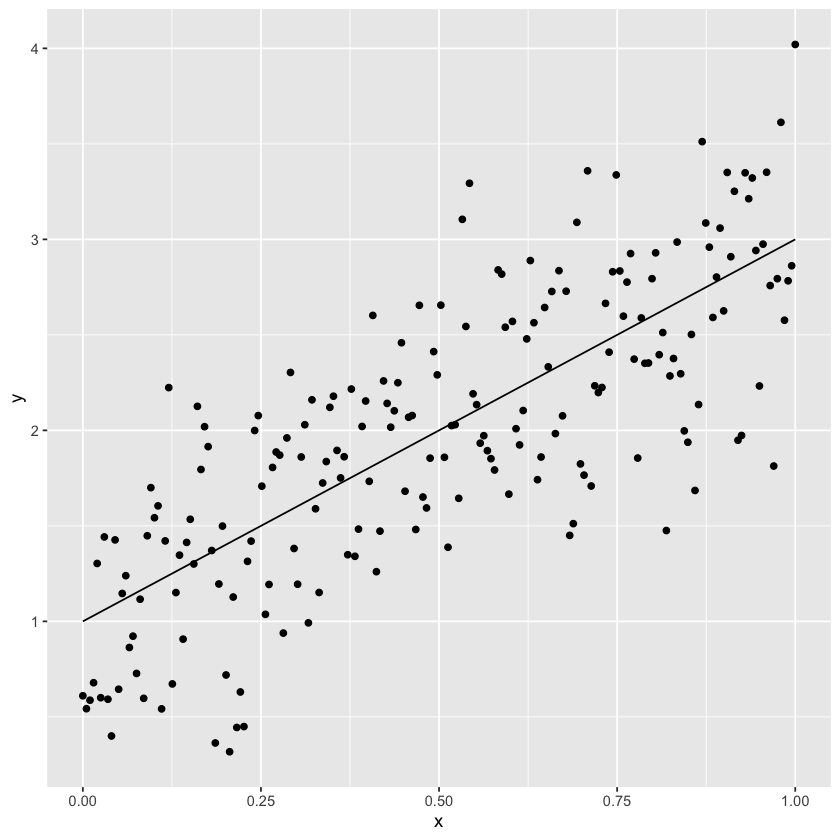

In [10]:
data %>% ggplot(aes(x=x, y=y)) + geom_point() + geom_line(aes(y=true_regression_line))

In [11]:
model_rethinking = ulam(
  alist(
    y ~ dnorm(mu, sigma),
    mu <- a + b*x,
    a ~ dnorm(0, 20),
    b ~ dnorm(0, 20),
    sigma ~ dexp(1)
  ), data = data
)


SAMPLING FOR MODEL '993c912a6c08795369ec7d7e66378755' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.058318 seconds (Warm-up)
Chain 1:                0.0542 seconds (Sampling)
Chain 1:     

In [12]:
summary(model_rethinking)

Inference for Stan model: 993c912a6c08795369ec7d7e66378755.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
a      0.97    0.01 0.07  0.84  0.92  0.97  1.01  1.10   113 1.01
b      2.03    0.01 0.12  1.79  1.94  2.02  2.11  2.25   172 1.00
sigma  0.48    0.00 0.02  0.44  0.47  0.48  0.50  0.54   281 1.00
lp__  44.23    0.09 1.19 41.28 43.71 44.55 45.13 45.60   163 1.00

Samples were drawn using NUTS(diag_e) at Tue Jan 25 22:30:17 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


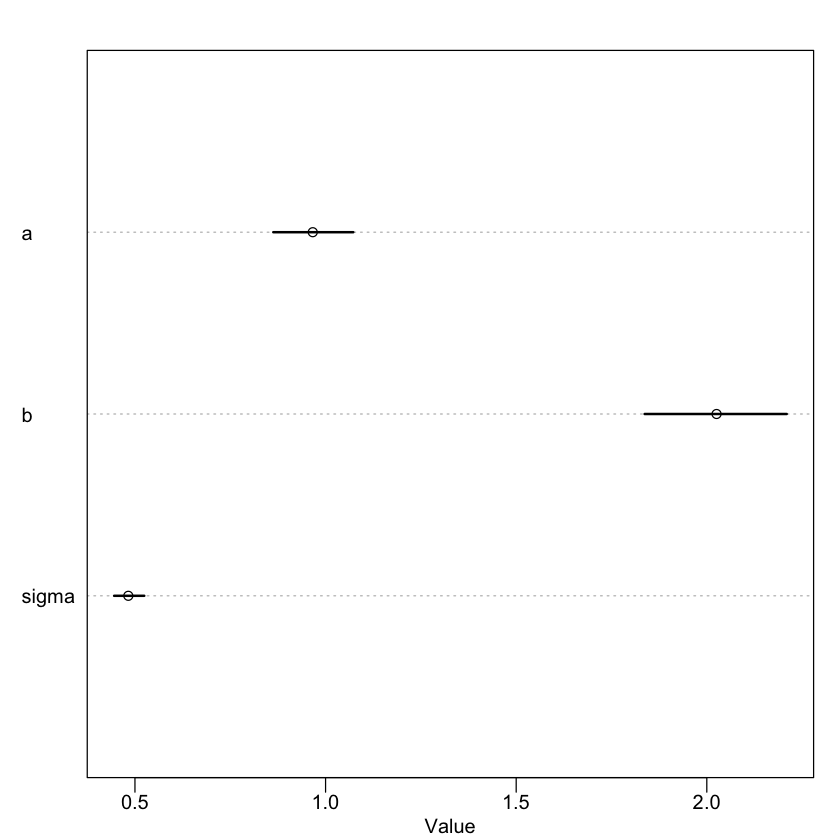

In [13]:
plot(model_rethinking)

In [14]:
model_brms = brm(formula = y ~ 1 + x, data = data)

Start sampling



Running MCMC with 4 chains, at most 12 in parallel...

Chain 3 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 3 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 3 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 3 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 3 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 3 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 3 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 3 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 3 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 3 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 3 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 3 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 3 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 3 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 3 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 3 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 3 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 3 Iteration: 1700 / 2000 [ 85%]  (Sampling)

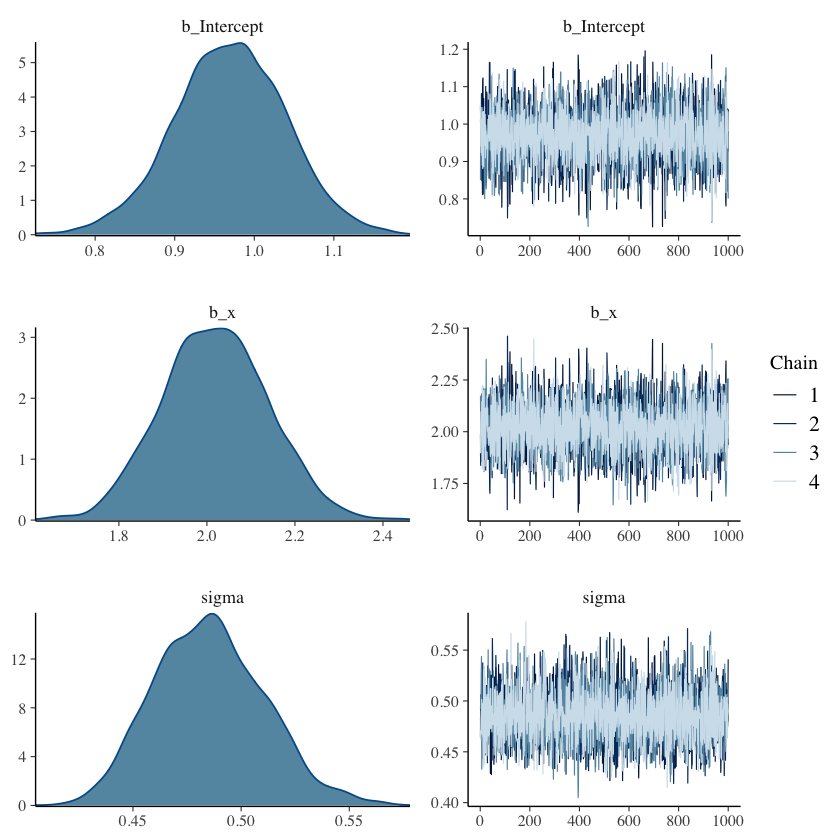

In [15]:
plot(model_brms)

In [16]:
summary(model_brms)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ 1 + x 
   Data: data (Number of observations: 200) 
  Draws: 4 chains, each with iter = 1000; warmup = 0; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.97      0.07     0.83     1.11 1.00     3857     3038
x             2.02      0.12     1.79     2.25 1.00     3837     3079

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.49      0.03     0.44     0.54 1.00     3908     3402

Draws were sampled using sample(hmc). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [17]:
describe_posterior(model_brms)

,Parameter,Median,CI,CI_low,CI_high,pd,ROPE_CI,ROPE_low,ROPE_high,ROPE_Percentage,Rhat,ESS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,b_Intercept,0.9698,0.95,0.835,1.113,1,0.95,-0.07587,0.07587,0,1,3829
2,b_x,2.0181,0.95,1.790,2.254,1,0.95,-0.07587,0.07587,0,1,3829


In [18]:
summary(lm(y ~ 1 + x, data = data))


Call:
lm(formula = y ~ 1 + x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1480 -0.3482  0.0251  0.3653  1.2276 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   0.9711     0.0679    14.3 <0.0000000000000002 ***
x             2.0176     0.1175    17.2 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.482 on 198 degrees of freedom
Multiple R-squared:  0.598,	Adjusted R-squared:  0.596 
F-statistic:  295 on 1 and 198 DF,  p-value: <0.0000000000000002
